In [1]:
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
def pre_setting():
    last_train_data_add = pd.read_csv("last_train.csv")
    last_test_data_add = pd.read_csv("last_test.csv")
    
    X = last_train_data_add
    y = last_test_data_add
    
#     clf1 = linear_model.LogisticRegression(n_jobs=-1)
#     clf2 = RandomForestClassifier(n_jobs=-1)
#     clf3 = ExtraTreesClassifier(n_jobs=-1)
#     clf4 = xgb.XGBClassifier(nthread=3, n_jobs=-1)
    clf5 = lgb.LGBMClassifier(nthread=3, n_jobs=-1, reg_alpha=1)
#     eclf2 = VotingClassifier(estimators=[('log', clf1), ('rf', clf2), ('ex', clf3), ('xgb', clf4), ('lgb', clf5)], voting='soft', weights=[1,1,1,1,1])
    
    return X, y, clf5

X, y, clf5  = pre_setting()

In [5]:
def submit_kaggle(df_train, df_test, model, user_id, target):
    
    le = LabelEncoder()

    y_train = le.fit_transform(df_train[target])
    X_train = df_train.drop([target, user_id], axis = 1)
    
    X_test_id = df_test[user_id]
    X_test = df_test.drop([target, user_id], axis = 1)
    

    print("model fitting 시작")
    
    model = model.fit(X_train, y_train)
    
    predic_proba = model.predict_proba(X_test)
    
   
    print("model fitting 종료")

    df_submit = pd.DataFrame(columns=["id", "country"])
    ids = []
    cts = []
    for i in range(len(X_test_id)):
        idx = X_test_id.iloc[i]
        ids += [idx] * 5
        cts += le.inverse_transform(np.argsort(predic_proba[i])[::-1])[:5].tolist()
    df_submit["id"] = ids
    df_submit["country"] = cts
    df_submit.to_csv('submit_xg.csv', index = False)
    print("csv file 생성")
    !kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f 'submit_xg.csv' -m "Message"

In [6]:
submit_kaggle(X, y, clf5, "id", "country_destination")

model fitting 시작
model fitting 종료
csv file 생성
Successfully submitted to Airbnb New User Bookings

In [19]:
import lightgbm.plotting
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

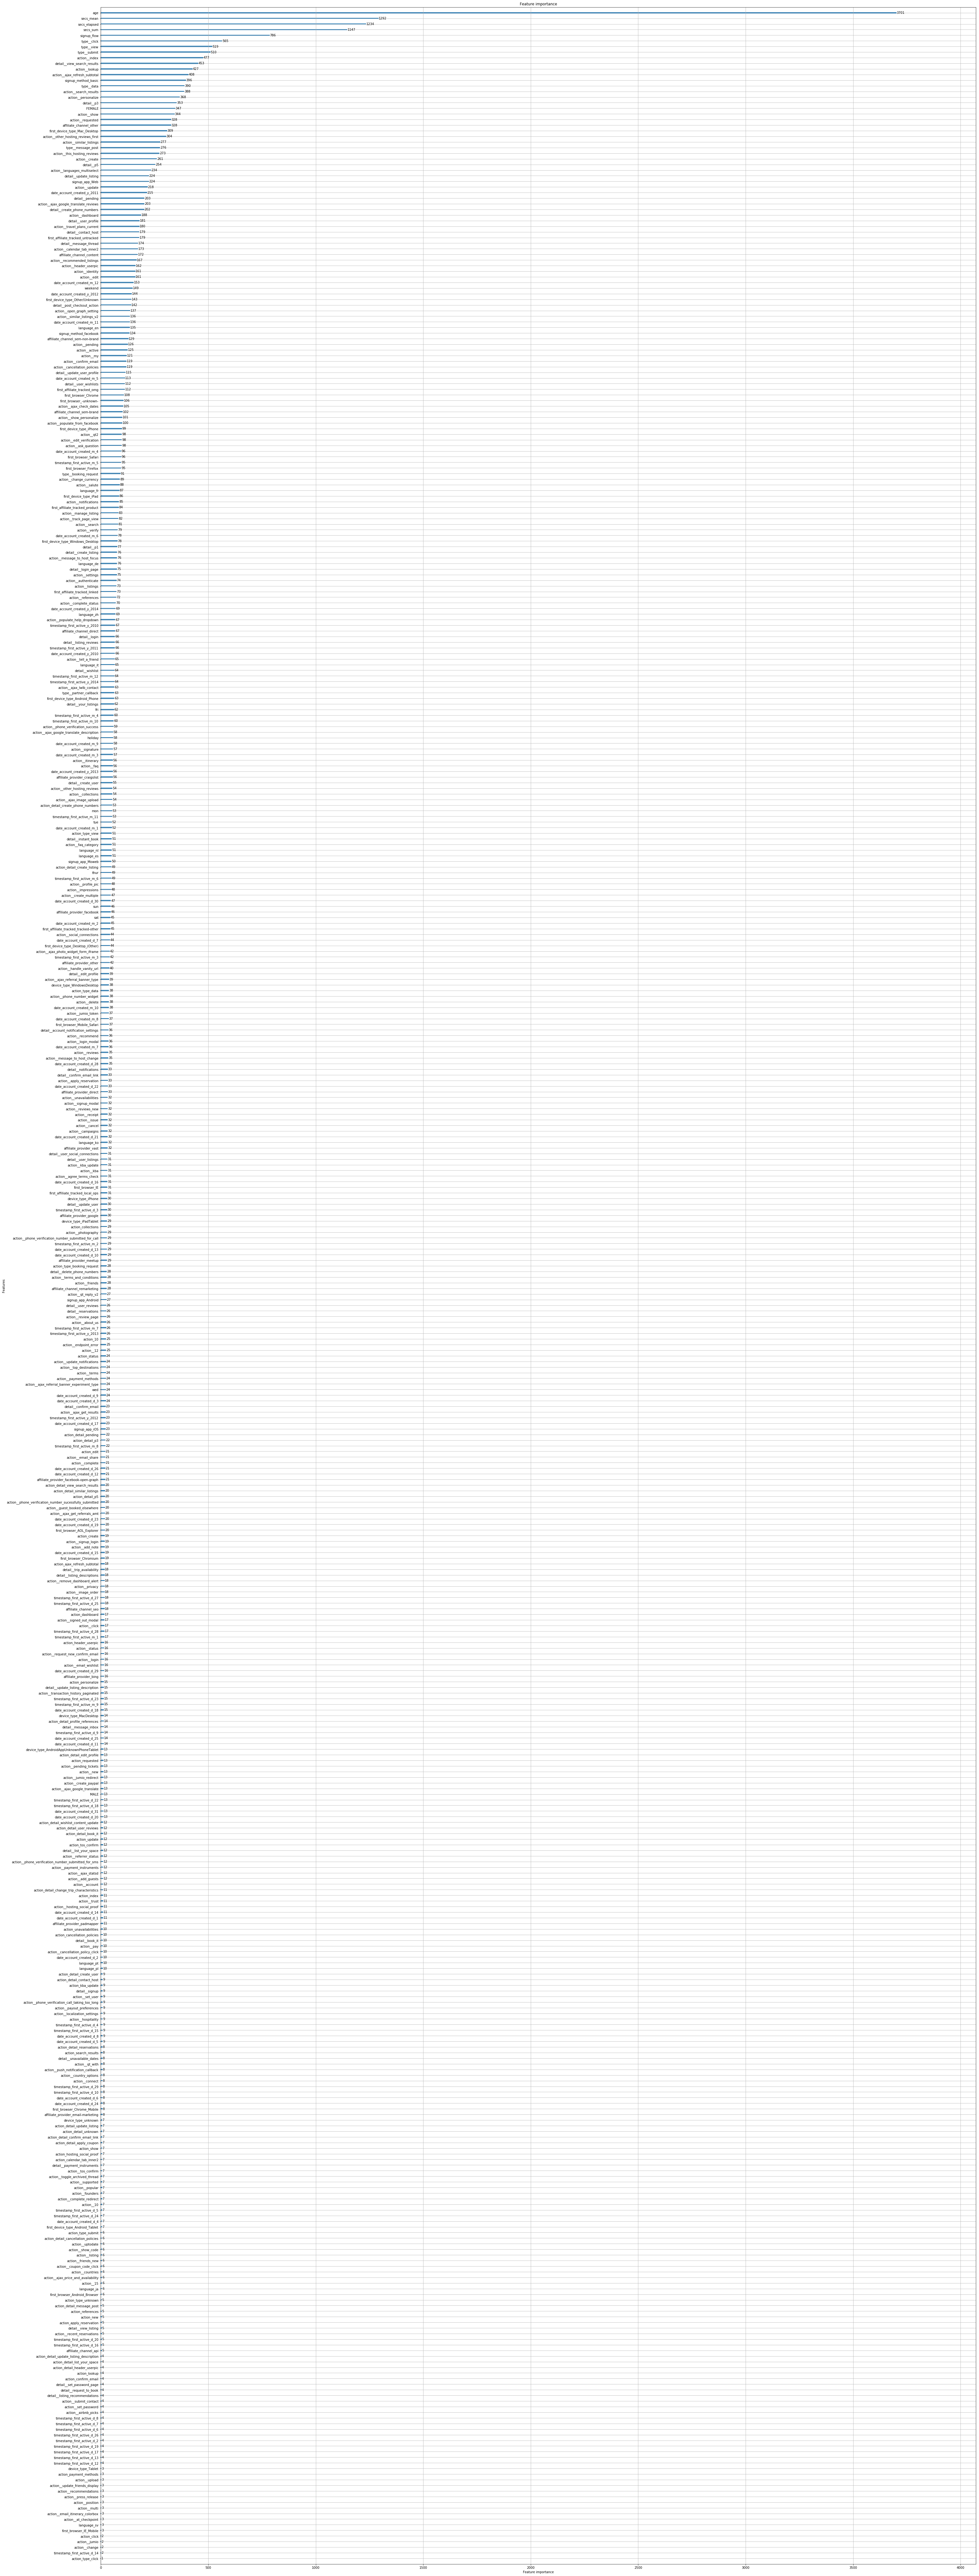

In [26]:
lightgbm.plot_importance(clf5, figsize=(50,150))